In [1]:
import numpy as np
import globals as gl
import nibabel as nb
import os
import matplotlib.pyplot as plt
import pandas as pd
from nitools import spm
import nitools as nt
import warnings
from util import load_matlab_hrf

warnings.filterwarnings("ignore")
plt.style.use('default')


Base directory found: /cifs/diedrichsen/data/Chord_exp/ExtFlexChord
Atlas directory found: /cifs/diedrichsen/data/Atlas_templates/fs_LR_32


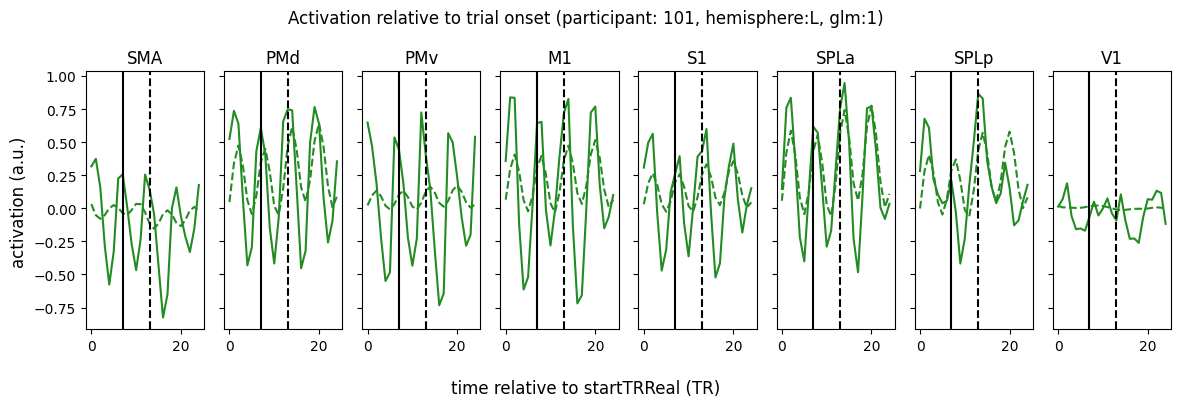

In [2]:
experiment = 'efc4'
Hem = 'L'
rois = ['SMA', 'PMd', 'PMv', 'M1', 'S1', 'SPLa', 'SPLp', 'V1']
r = 0
glm = 1
sn = 101

path_glm = os.path.join(gl.baseDir, experiment,  f'{gl.glmDir}{glm}', f'subj{sn}', 'T.mat')

T = load_matlab_hrf(path_glm)

fig, axs = plt.subplots(1, len(rois), sharex=True, sharey=True, figsize=(12, 4))
for r, roi in enumerate(rois):
    hem = T['hem']==Hem
    roi = T['name']==rois[r]

    y_adj = np.nanmean(T['y_adj'][roi & hem], axis=0)

    y_hat = np.nanmean(T['y_hat'][roi & hem], axis=0)

    axs[r].plot(y_adj, color='forestgreen', label='go adj', ls='-')
    axs[r].plot(y_hat, color='forestgreen', label='go hat', ls='--')

    axs[r].axvline(7, color='k', ls='-')
    axs[r].axvline(13, color='k', ls='--')

    axs[r].set_title(rois[r])

fig.supylabel('activation (a.u.)')
fig.supxlabel('time relative to startTRReal (TR)')
fig.suptitle(f'Activation relative to trial onset (participant: {sn}, hemisphere:{Hem}, glm:{glm})')

fig.tight_layout()